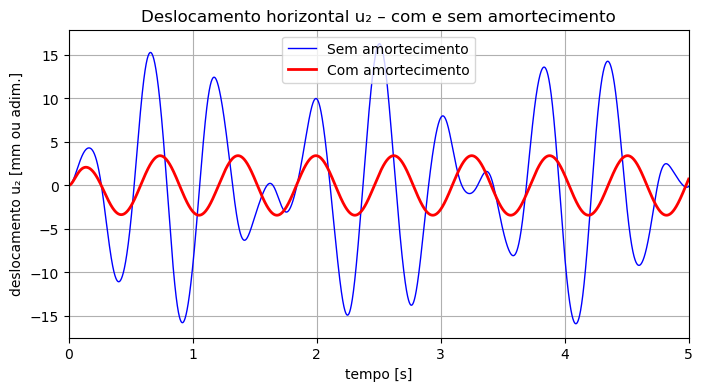

In [2]:
"""
Exemplo 1.5.2 – Sistema massa–mola 2 GDL em vibração forçada
--------------------------------------------------------------
Solução numérica via método da Aceleração Média Constante (Newmark-β)
para comparação de resposta COM e SEM amortecimento.

Base: Rao / Meirovitch / Inman

Parâmetros:
  M = diag(10,10)
  K = [[10000, -5000],
       [-5000, 5000]]
  C = diag(200,200)   (com amortecimento)
  F(t) = [0, 10000*cos(10t)]ᵀ
"""

import numpy as np
import matplotlib.pyplot as plt

# ==== Dados ====
M = np.diag([10, 10])
K = np.array([[10000, -5000],
              [-5000,  5000]])
C = np.diag([200, 200])     # com amortecimento
C0 = np.zeros_like(C)       # sem amortecimento

# Excitação harmônica
def F(t):
    return np.array([0.0, 10000*np.cos(10*t)])

# ==== Parâmetros do método Newmark ====
beta = 1/4     # método da aceleração média constante
gamma = 1/2
dt = 0.0001
t_total = 5.0
t = np.arange(0, t_total+dt, dt)

# ==== Função de integração ====
def newmark(M, C, K):
    nd = M.shape[0]
    nsteps = len(t)
    x = np.zeros((nd, nsteps))
    v = np.zeros((nd, nsteps))
    a = np.zeros((nd, nsteps))

    # Condições iniciais
    x[:, 0] = np.array([0.0, 0.0])
    v[:, 0] = np.array([0.0, 0.0])
    a[:, 0] = np.linalg.inv(M) @ (F(0) - C @ v[:, 0] - K @ x[:, 0])

    # Matriz efetiva
    K_eff = K + gamma/(beta*dt)*C + M/(beta*dt**2)
    K_eff_inv = np.linalg.inv(K_eff)

    for i in range(1, nsteps):
        F_eff = (F(t[i])
                 + M @ ((1/(beta*dt**2))*x[:, i-1] + (1/(beta*dt))*v[:, i-1] + (1/(2*beta)-1)*a[:, i-1])
                 + C @ ((gamma/(beta*dt))*x[:, i-1] + (gamma/beta - 1)*v[:, i-1]
                        + dt*(gamma/(2*beta)-1)*a[:, i-1]))

        x[:, i] = K_eff_inv @ F_eff
        a[:, i] = (1/(beta*dt**2))*(x[:, i] - x[:, i-1]) - (1/(beta*dt))*v[:, i-1] - ((1/(2*beta))-1)*a[:, i-1]
        v[:, i] = v[:, i-1] + dt*((1-gamma)*a[:, i-1] + gamma*a[:, i])

    return x, v, a

# ==== Soluções ====
x_com, _, _  = newmark(M, C, K)
x_sem, _, _  = newmark(M, C0, K)

# ==== Plot ====
plt.figure(figsize=(8,4))
plt.plot(t, x_sem[1,:], 'b', label="Sem amortecimento", linewidth=1)
plt.plot(t, x_com[1,:], 'r', label="Com amortecimento", linewidth=2)
plt.title("Deslocamento horizontal u₂ – com e sem amortecimento")
plt.xlabel("tempo [s]")
plt.ylabel("deslocamento u₂ [mm ou adim.]")
plt.grid(True)
plt.legend()
plt.xlim(0, 5)
plt.show()
